<a href="https://colab.research.google.com/github/martinjry/hello/blob/master/RNN_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM,SimpleRNN
import keras
from tensorflow.keras import optimizers
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import files

In [ ]:
# 삼성전자 XLSX 다운로드
uploaded = files.upload()

Saving 삼성전자.xlsx to 삼성전자.xlsx


In [ ]:
# 현대건설 XLSX 다운로드
uploaded = files.upload()

Saving 현대건설.xlsx to 현대건설.xlsx


In [ ]:
# SK하이닉스 XLSX 다운로드
uploaded = files.upload()

Saving SK하이닉스.xlsx to SK하이닉스.xlsx


In [ ]:
# DATAFRAME 저장
dt= pd.read_excel('삼성전자.xlsx')
dt1= pd.read_excel('현대건설.xlsx')
dt2= pd.read_excel('SK하이닉스.xlsx')

In [ ]:
#  데이터 전처리 삼성전자
dt_scaled= data_progress(dt)
print(dt_scaled)
train,test = test_set(dt_scaled,300)
train_feature,train_label,test_feature,test_label = label_feature(train,test) # train dataset test dataset
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2) # train, validation set 생성
test_feature.shape, test_label.shape

            종가        시가        고가        저가       거래량
0     0.269841  0.294229  0.275338  0.283951  0.409302
1     0.282913  0.286660  0.263514  0.285850  0.217675
2     0.251167  0.286660  0.256757  0.266857  0.136459
3     0.264239  0.269631  0.238176  0.261159  0.110579
4     0.258637  0.275307  0.246622  0.272555  0.068783
...        ...       ...       ...       ...       ...
1005  0.523810  0.543992  0.486486  0.542260  0.174031
1006  0.520075  0.528855  0.474662  0.540361  0.094024
1007  0.518207  0.523179  0.466216  0.525166  0.248944
1008  0.492063  0.502365  0.452703  0.511871  0.207067
1009  0.464052  0.472091  0.425676  0.479582  0.114657

[1010 rows x 5 columns]


((280, 20, 4), (280, 1))

In [ ]:
#  데이터 전처리 현대건설
dt1_scaled = data_progress(dt1)
print(dt1_scaled)
train1,test1 = test_set(dt1_scaled,300)
train1_feature,train1_label,test1_feature,test1_label = label_feature(train1,test1)# train dataset
x1_train, x1_valid, y1_train, y1_valid = train_test_split(train1_feature, train1_label, test_size=0.2) # train, validation set 생성
test1_feature.shape, test1_label.shape

            종가        시가        고가        저가       거래량
0     0.779264  0.719563  0.776650  0.752484  0.376354
1     0.732441  0.734677  0.783418  0.788618  0.350574
2     0.720736  0.751469  0.747885  0.741644  0.359080
3     0.735786  0.774979  0.785110  0.794038  0.337851
4     0.754181  0.732997  0.749577  0.761518  0.253279
...        ...       ...       ...       ...       ...
1005  0.382107  0.387070  0.373942  0.408311  0.015743
1006  0.392140  0.385390  0.386633  0.409214  0.018413
1007  0.378763  0.392107  0.376481  0.405601  0.019286
1008  0.387960  0.375315  0.383249  0.397471  0.020363
1009  0.354515  0.378673  0.363790  0.383017  0.027534

[1010 rows x 5 columns]


((280, 20, 4), (280, 1))

In [ ]:
#  데이터 전처리 SK하이닉스
dt2_scaled = data_progress(dt2)
print(dt2_scaled)
train2,test2 =test_set(dt2_scaled,300)
train2_feature,train2_label,test2_feature,test2_label =label_feature(train2,test2)# train dataset
x2_train, x2_valid, y2_train, y2_valid = train_test_split(train2_feature, train2_label, test_size=0.2) # train, validation set 생성
test2_feature.shape, test2_label.shape

            종가        시가        고가        저가       거래량
0     0.278634  0.284153  0.278261  0.301865  0.083850
1     0.284141  0.295082  0.291304  0.308858  0.099632
2     0.283040  0.292896  0.284783  0.307692  0.060908
3     0.309471  0.304918  0.296739  0.324009  0.116077
4     0.312775  0.318033  0.307609  0.334499  0.051050
...        ...       ...       ...       ...       ...
1006  0.531938  0.513661  0.532609  0.557110  0.104973
1007  0.526432  0.524590  0.527174  0.557110  0.192121
1008  0.504405  0.508197  0.500000  0.533800  0.127509
1009  0.454846  0.464481  0.461957  0.493007  0.163876
1010  0.439427  0.430601  0.446739  0.467366  0.021587

[1011 rows x 5 columns]


((280, 20, 4), (280, 1))

In [ ]:
def label_feature(train,test):
  feature_cols = ['시가','고가','저가','거래량']
  label_cols = ['종가']
  train_feature = train[feature_cols]
  train_label = train[label_cols]
  test_feature = test[feature_cols]
  test_label = test[label_cols]
  train_feature, train_label = make_dataset(train_feature, train_label, 20)
  test_feature, test_label = make_dataset(test_feature, test_label, 20)
  return train_feature,train_label,test_feature,test_label
def data_progress(dt):
  scaler = MinMaxScaler()
  scale_cols = ['종가','시가','고가','저가','거래량']
  dt_scaled = scaler.fit_transform(dt[scale_cols])
  dt_scaled = pd.DataFrame(dt_scaled)
  dt_scaled.columns = scale_cols
  return dt_scaled
def test_set(dt_scaled, TEST_SIZE): #train_set test_set 분할
  train = dt_scaled[:-TEST_SIZE]
  test = dt_scaled[-TEST_SIZE:]
  return train,test
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))   
    return np.array(feature_list), np.array(label_list)
def LSTM_test(x_train,y_train,x_valid,y_valid):
  model = Sequential()
  model.add(LSTM(10,input_shape=(train_feature.shape[1], train_feature.shape[2]),activation='relu', return_sequences=False))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid))
  return model
def complexRNN(x_train,y_train,x_valid,y_valid):
  model= keras.models.Sequential([keras.layers.SimpleRNN(40,return_sequences=True,input_shape=[None,4]),keras.layers.SimpleRNN(40), keras.layers.Dense(1)])
  model.compile(loss="mse",optimizer="adam")
  history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid))
  return model
def simpleRNN(x_train,y_train,x_valid,y_valid):
  model=keras.models.Sequential([keras.layers.SimpleRNN(1,input_shape=[None,4])])
  optimizer=optimizers.Adam(lr=0.005)
  model.compile(loss="mse", optimizer=optimizer)
  history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid))
  return model
def simpleCnn(x_train,y_train,x_valid,y_valid):
  model = Sequential()
  model.add(Conv1D(filters = 128, kernel_size = 3, activation = 'relu' , input_shape =  [20,4]))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  model.add(Dense(1,activation = 'sigmoid'))
  model.compile(loss='mse', optimizer = 'adam')
  history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid))
  return model
def complexCnn(x_train,y_train,x_valid,y_valid):
  model = Sequential()
  model.add(Conv1D(filters = 128, kernel_size = 3, activation = 'relu' , input_shape =  [20,4]))
  model.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
  model.add(Conv1D(filters = 32, kernel_size = 1, activation = 'relu'))
  model.add(Conv1D(filters = 16, kernel_size = 1, activation = 'relu'))
  model.add(MaxPooling1D(pool_size = 2))
  model.add(Flatten())
  model.add(Dense(100,activation='relu'))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(25,activation='relu'))
  model.add(Dense(1,activation = 'sigmoid'))
  model.compile(loss='mse', optimizer = 'adam')
  history=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid))
  return model
def show_predict(model,x_valid,y_valid,test_feature,test_label):
  loss = model.evaluate(x_valid, y_valid, verbose=0)
  print('최종 MSE 손실값 : {:.6f}'.format(loss))
  pred = model.predict(test_feature)
  model.summary()
  plt.figure(figsize=(12, 9))
  plt.plot(test_label, label='actual')
  plt.plot(pred, label='prediction')
  plt.legend()
  plt.show()


In [ ]:
lstm_test =LSTM_test(x_train,y_train,x_valid,y_valid)

Epoch 1/200
18/18 [==============================] - 2s 27ms/step - loss: 0.1204 - val_loss: 0.0813
Epoch 2/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0668 - val_loss: 0.0284
Epoch 3/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0152 - val_loss: 0.0108
Epoch 4/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 5/200
18/18 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 6/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 7/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 8/200
18/18 [==============================] - 0s 13ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 9/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 10/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0015

In [ ]:
complex_rnn = complexRNN(x_train,y_train,x_valid,y_valid)

Epoch 1/200
18/18 [==============================] - 2s 32ms/step - loss: 0.0129 - val_loss: 0.0041
Epoch 2/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 3/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 9.2609e-04
Epoch 4/200
18/18 [==============================] - 0s 12ms/step - loss: 9.2841e-04 - val_loss: 9.9121e-04
Epoch 5/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0010 - val_loss: 7.4781e-04
Epoch 6/200
18/18 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 7/200
18/18 [==============================] - 0s 11ms/step - loss: 8.3859e-04 - val_loss: 7.2499e-04
Epoch 8/200
18/18 [==============================] - 0s 13ms/step - loss: 7.3258e-04 - val_loss: 7.2348e-04
Epoch 9/200
18/18 [==============================] - 0s 12ms/step - loss: 6.9928e-04 - val_loss: 0.0012
Epoch 10/200
18/18 [==============================] - 0s 13ms/st

In [ ]:
simple_rnn = simpleRNN(x_train,y_train,x_valid,y_valid)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


18/18 [==============================] - 1s 20ms/step - loss: 0.1473 - val_loss: 0.0868
Epoch 2/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0683 - val_loss: 0.0523
Epoch 3/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0450 - val_loss: 0.0306
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0310 - val_loss: 0.0246
Epoch 5/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0264 - val_loss: 0.0242
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.0235
Epoch 7/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.0232
Epoch 8/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.0234
Epoch 9/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.0232
Epoch 10/200
18/18 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.0231
Epoch 11/200
18/18 [

In [ ]:
simple_cnn = simpleCnn(x_train,y_train,x_valid,y_valid)

Epoch 1/200
18/18 [==============================] - 1s 16ms/step - loss: 0.0818 - val_loss: 0.0724
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0554 - val_loss: 0.0406
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0228 - val_loss: 0.0105
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 8/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 9/200
18/18 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 10/200
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 11

In [ ]:
complex_cnn = complexCnn(x_train,y_train,x_valid,y_valid)

Epoch 1/200
18/18 [==============================] - 1s 22ms/step - loss: 0.0741 - val_loss: 0.0445
Epoch 2/200
18/18 [==============================] - 0s 10ms/step - loss: 0.0151 - val_loss: 0.0047
Epoch 3/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 4/200
18/18 [==============================] - 0s 10ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 5/200
18/18 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 6/200
18/18 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 7/200
18/18 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 8/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 9/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 10/200
18/18 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 0.0019

최종 MSE 손실값 : 0.000534
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                600       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


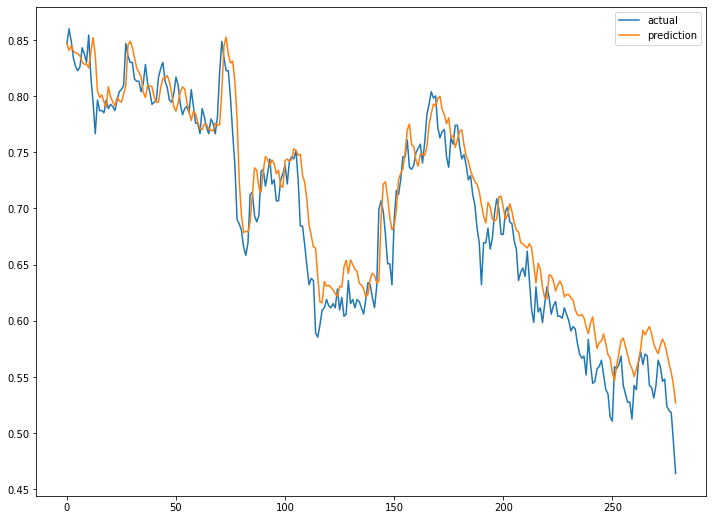

In [ ]:
# lstm_test 삼성전자 show_predict(model,x_valid,y_valid,test_feature,test_label)
show_predict(lstm_test,x_valid,y_valid,test_feature,test_label)

최종 MSE 손실값 : 0.000506
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 40)          1800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


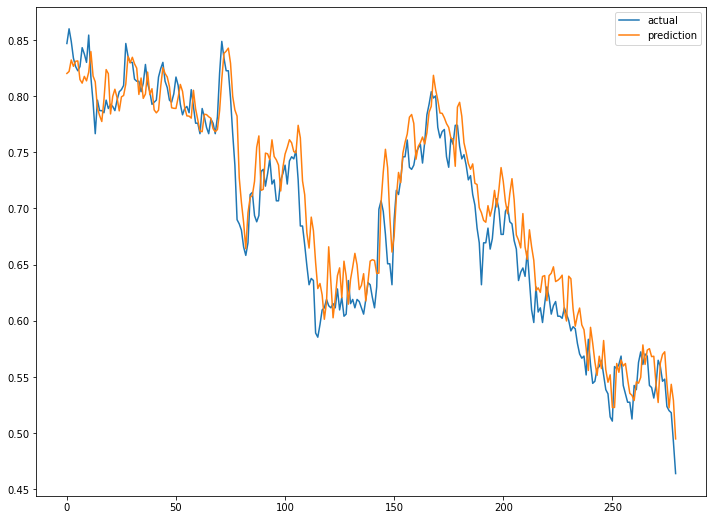

In [ ]:
# complex_rnn 삼성전자
show_predict(complex_rnn,x_valid,y_valid,test_feature,test_label)

최종 MSE 손실값 : 0.013544
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


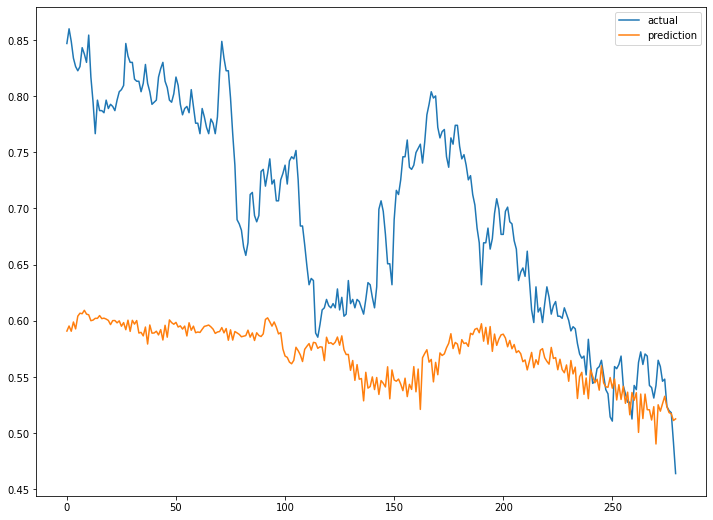

In [ ]:
# simple_rnn 삼성전자
show_predict(simple_rnn,x_valid,y_valid,test_feature,test_label)

최종 MSE 손실값 : 0.000766
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 128)           1664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1153      
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


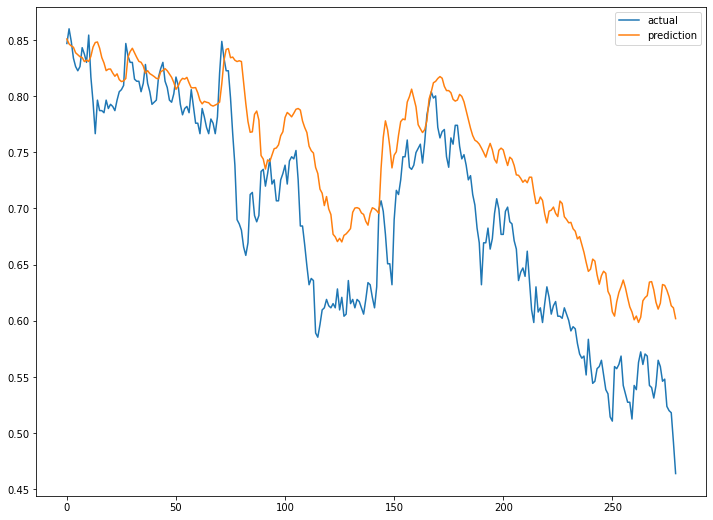

In [ ]:
# simple_cnn 삼성전자
show_predict(simple_cnn,x_valid,y_valid,test_feature,test_label)

최종 MSE 손실값 : 0.000694
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 18, 128)           1664      
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 64)            16448     
                                                                 
 conv1d_3 (Conv1D)           (None, 17, 32)            2080      
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 16)            528       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 16)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                

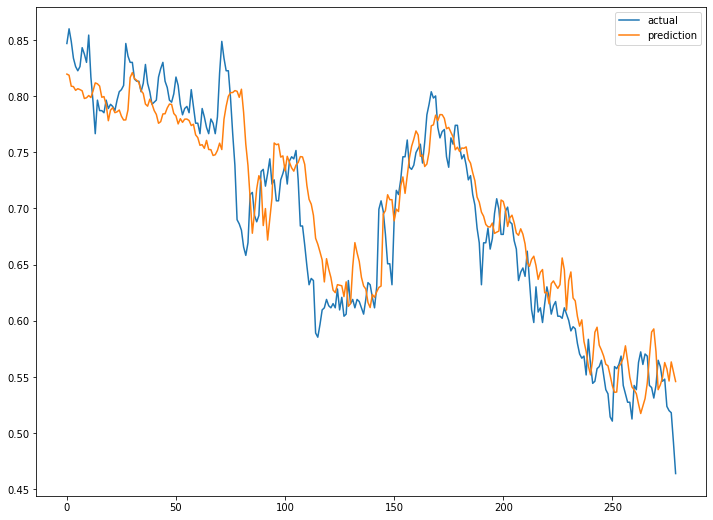

In [ ]:
# complex_cnn 삼성전자
show_predict(complex_cnn,x_valid,y_valid,test_feature,test_label)

최종 MSE 손실값 : 0.002922
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                600       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


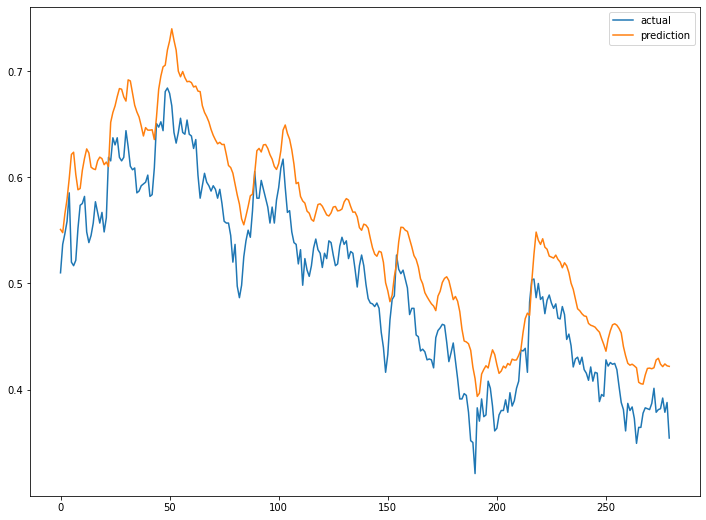

In [ ]:
# 현대건설 
show_predict(lstm_test,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_cnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_cnn,x1_valid,y1_valid,test1_feature,test1_label)

최종 MSE 손실값 : 0.001091
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 40)          1800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


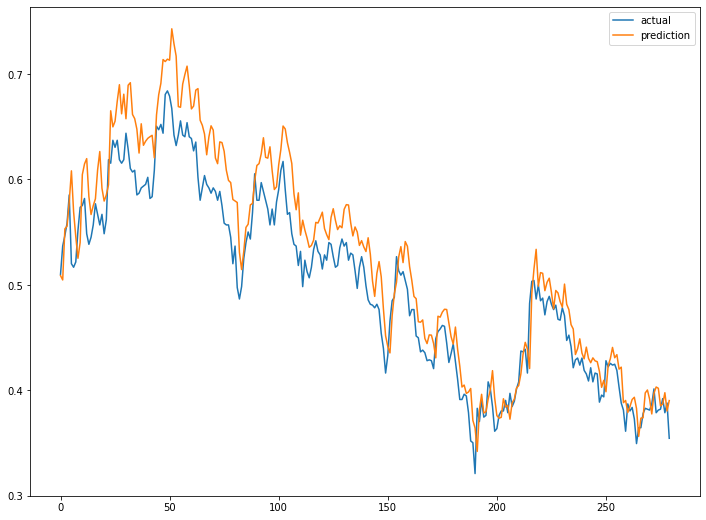

In [ ]:
# 현대건설 
# show_predict(lstm_test,x1_valid,y1_valid,test1_feature,test1_label)
show_predict(complex_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_cnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_cnn,x1_valid,y1_valid,test1_feature,test1_label)

최종 MSE 손실값 : 0.011026
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


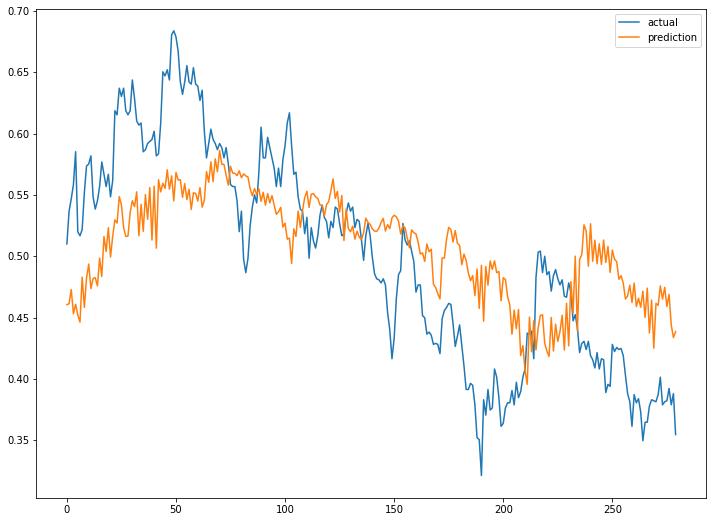

In [ ]:
# 현대건설 
# show_predict(lstm_test,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_rnn,x1_valid,y1_valid,test1_feature,test1_label)
show_predict(simple_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_cnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_cnn,x1_valid,y1_valid,test1_feature,test1_label)

최종 MSE 손실값 : 0.004903
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 128)           1664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1153      
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


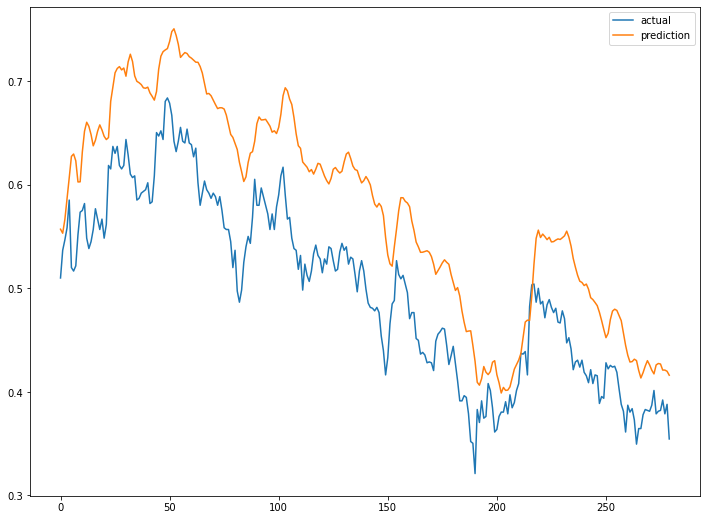

In [ ]:
# 현대건설 
# show_predict(lstm_test,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_rnn,x1_valid,y1_valid,test1_feature,test1_label)
show_predict(simple_cnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_cnn,x1_valid,y1_valid,test1_feature,test1_label)

최종 MSE 손실값 : 0.001978
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 18, 128)           1664      
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 64)            16448     
                                                                 
 conv1d_3 (Conv1D)           (None, 17, 32)            2080      
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 16)            528       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 16)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                

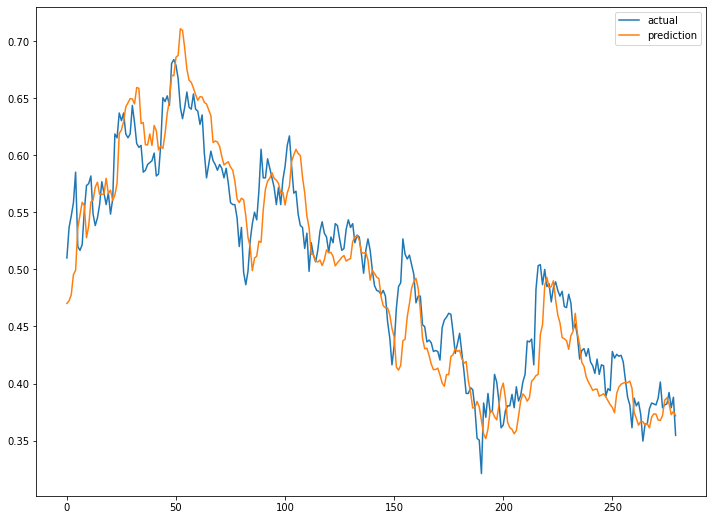

In [ ]:
# 현대건설 
# show_predict(lstm_test,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(complex_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_rnn,x1_valid,y1_valid,test1_feature,test1_label)
# show_predict(simple_cnn,x1_valid,y1_valid,test1_feature,test1_label)
show_predict(complex_cnn,x1_valid,y1_valid,test1_feature,test1_label)

최종 MSE 손실값 : 0.002145
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                600       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


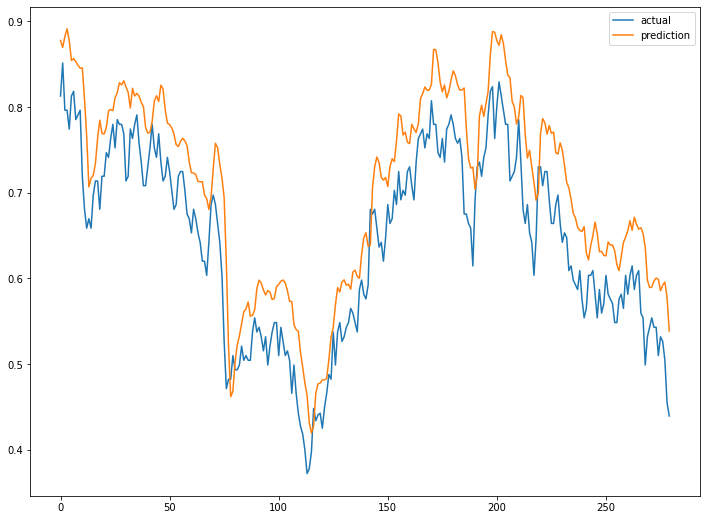

In [ ]:
# SK하이닉스
show_predict(lstm_test,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_cnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_cnn,x2_valid,y2_valid,test2_feature,test2_label)

최종 MSE 손실값 : 0.000803
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 40)          1800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


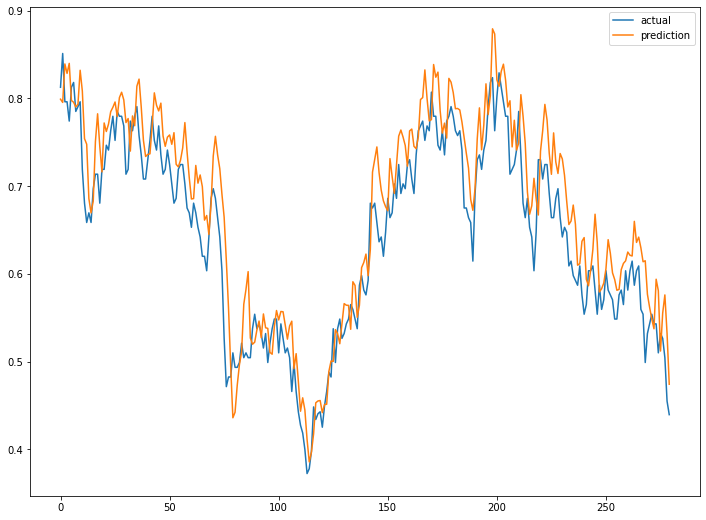

In [ ]:
# SK하이닉스
# show_predict(lstm_test,x2_valid,y2_valid,test2_feature,test2_label)
show_predict(complex_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_cnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_cnn,x2_valid,y2_valid,test2_feature,test2_label)

최종 MSE 손실값 : 0.018806
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


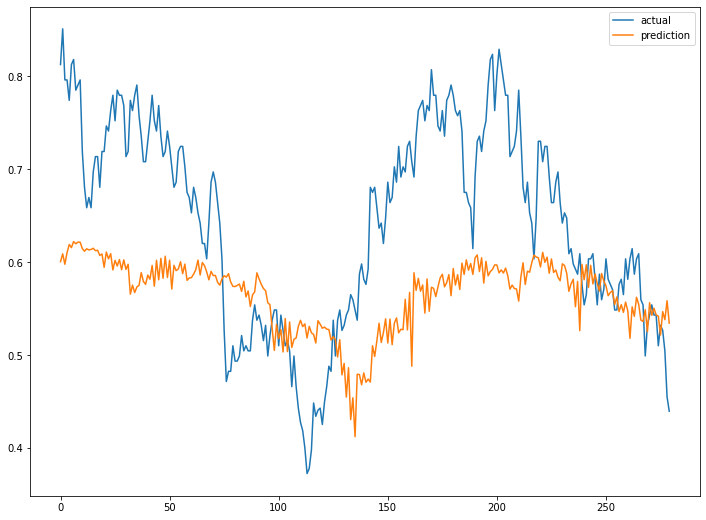

In [ ]:
# SK하이닉스
# show_predict(lstm_test,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_rnn,x2_valid,y2_valid,test2_feature,test2_label)
show_predict(simple_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_cnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_cnn,x2_valid,y2_valid,test2_feature,test2_label)

최종 MSE 손실값 : 0.001499
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 128)           1664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1153      
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


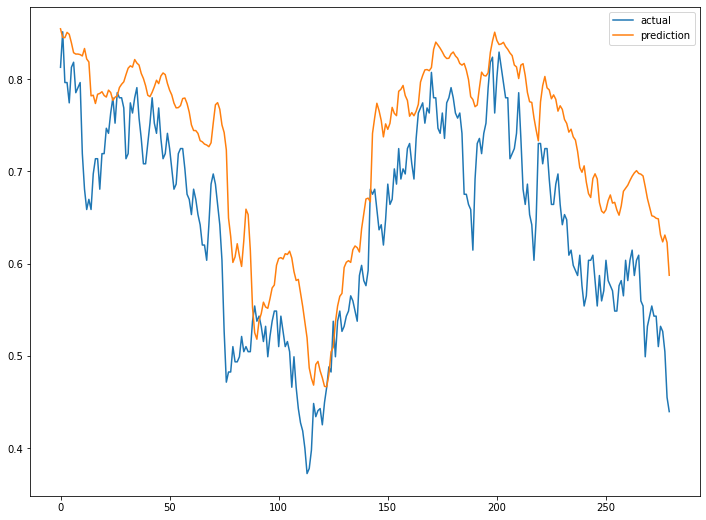

In [ ]:
# SK하이닉스
# show_predict(lstm_test,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_rnn,x2_valid,y2_valid,test2_feature,test2_label)
show_predict(simple_cnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_cnn,x2_valid,y2_valid,test2_feature,test2_label)

최종 MSE 손실값 : 0.001539
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 18, 128)           1664      
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 64)            16448     
                                                                 
 conv1d_3 (Conv1D)           (None, 17, 32)            2080      
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 16)            528       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 16)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                

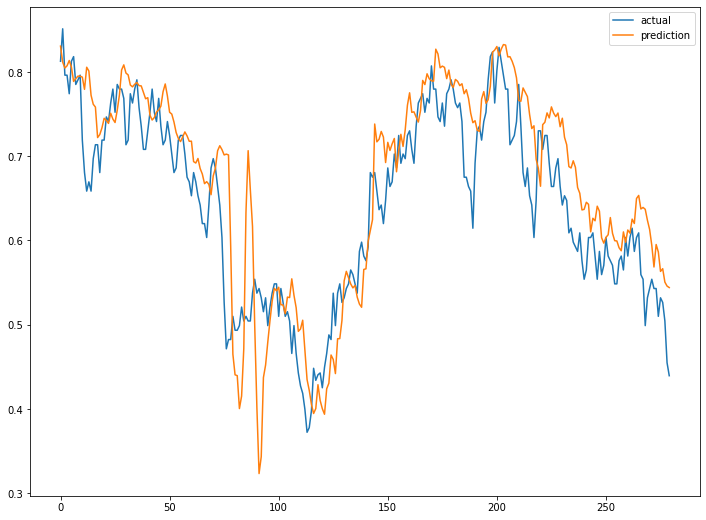

In [ ]:
# SK하이닉스
# show_predict(lstm_test,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(complex_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_rnn,x2_valid,y2_valid,test2_feature,test2_label)
# show_predict(simple_cnn,x2_valid,y2_valid,test2_feature,test2_label)
show_predict(complex_cnn,x2_valid,y2_valid,test2_feature,test2_label)